In [1]:
import numpy as np
import csv
import matplotlib.pyplot as plt

import load_files

In [2]:
wine_data_path = '../data/winequality-red.csv'
breast_cancer_data_path = '../data/breast-cancer-wisconsin.data'
breast_cancer_names_path = '../data/breast-cancer-wisconsin.names'

In [5]:
#open the files

# with open(wine_data_path, 'r') as f:
#     wines = list(csv.reader(f, delimiter=';'))

# wine_headers = wines[0]
# wines = np.array(wines[1:], dtype=np.float)


# with open(breast_cancer_data_path, 'r') as f:
#     cancer = list(csv.reader(f ))
# # with open(breast_cancer_names_path,'r') as f:
# #     cancer_names = list(csv.reader(f ))
# cancer_headers = ['id number','Clump Thickness','Uniformity of Cell Size','Uniformity of Cell Shape','Marginal Adhesion','Single Epithelial Cell Size','Bare Nuclei','Bland Chromatin','Normal Nucleoli','Mitoses','Class']


wine_data,wine_headers = load_files.load_wine()


In [11]:
#clean the data and make binary

for i in wines:
    if i[-1] >= 6:
        i[-1] = 1
    else:
        i[-1] = 0


cancer_good = []
j = 0
for i,line in enumerate(cancer):
    try:
        cancer_good.append( [int(x) for x in line])
    except ValueError as e:
        j += 1
        continue
    if cancer_good[i-j][-1] == 2:
        cancer_good[i-j][-1] = 0
    
    elif cancer_good[i-j][-1] == 4:
        cancer_good[i-j][-1] = 1
    
    else:
        print('somethins up..',i)
# make list into numpy array
cancer = np.asarray(cancer_good)

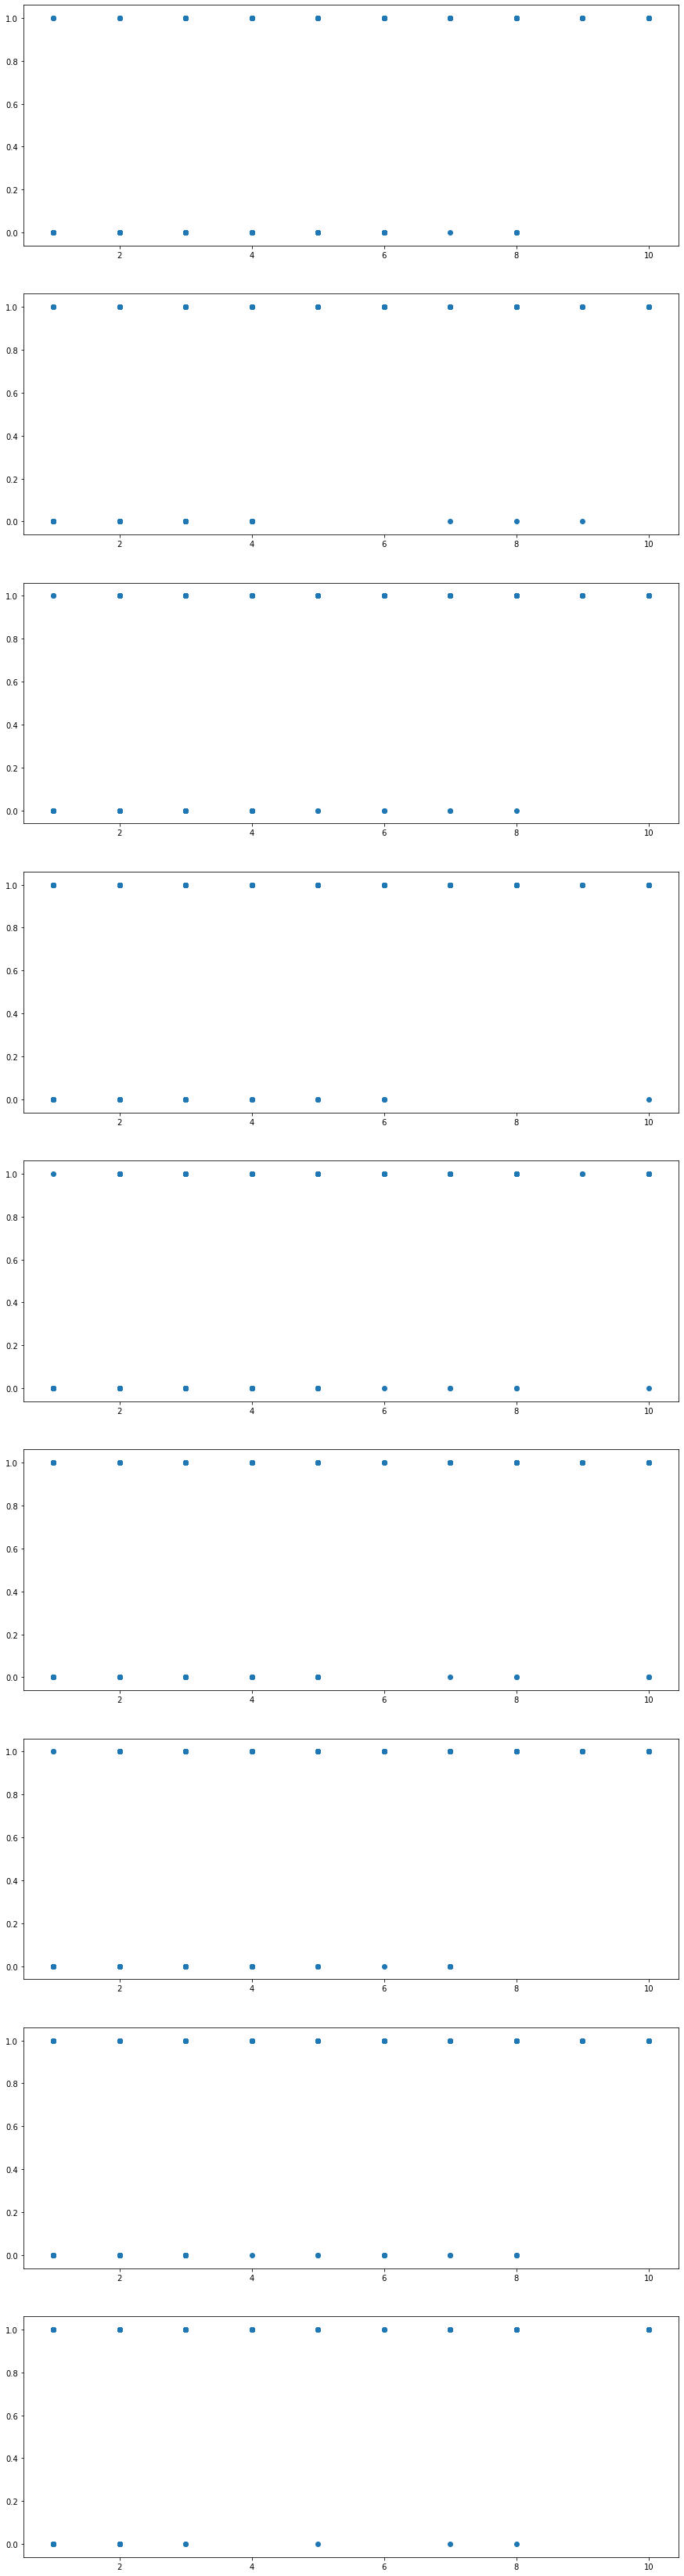

In [12]:
# useless
fig, axs = plt.subplots(len(cancer_headers)-2,1, figsize = (15,60))
for i,ax in enumerate(axs):
    ax.scatter(cancer[:,i+1],cancer[:,-1] )

Attribute:  Clump Thickness . mean :  7.188284518828452  +-  2.432801643243244 
mean :  2.963963963963964  +=  1.6707765251222568 

Attribute:  Uniformity of Cell Size . mean :  6.577405857740586  +-  2.7185385499992076 
mean :  1.3063063063063063  +=  0.854693378376896 

Attribute:  Uniformity of Cell Shape . mean :  6.560669456066946  +-  2.563723668755376 
mean :  1.4144144144144144  +=  0.9559530734879949 

Attribute:  Marginal Adhesion . mean :  5.585774058577406  +-  3.1899368652342637 
mean :  1.3468468468468469  +=  0.916054978858725 

Attribute:  Single Epithelial Cell Size . mean :  5.326359832635983  +-  2.4379701525372974 
mean :  2.108108108108108  +=  0.8761232311955693 

Attribute:  Bare Nuclei . mean :  7.627615062761507  +-  3.110151915853859 
mean :  1.3468468468468469  +=  1.17652104500383 

Attribute:  Bland Chromatin . mean :  5.97489539748954  +-  2.277642262902856 
mean :  2.0833333333333335  +=  1.061102463685029 

Attribute:  Normal Nucleoli . mean :  5.8577405

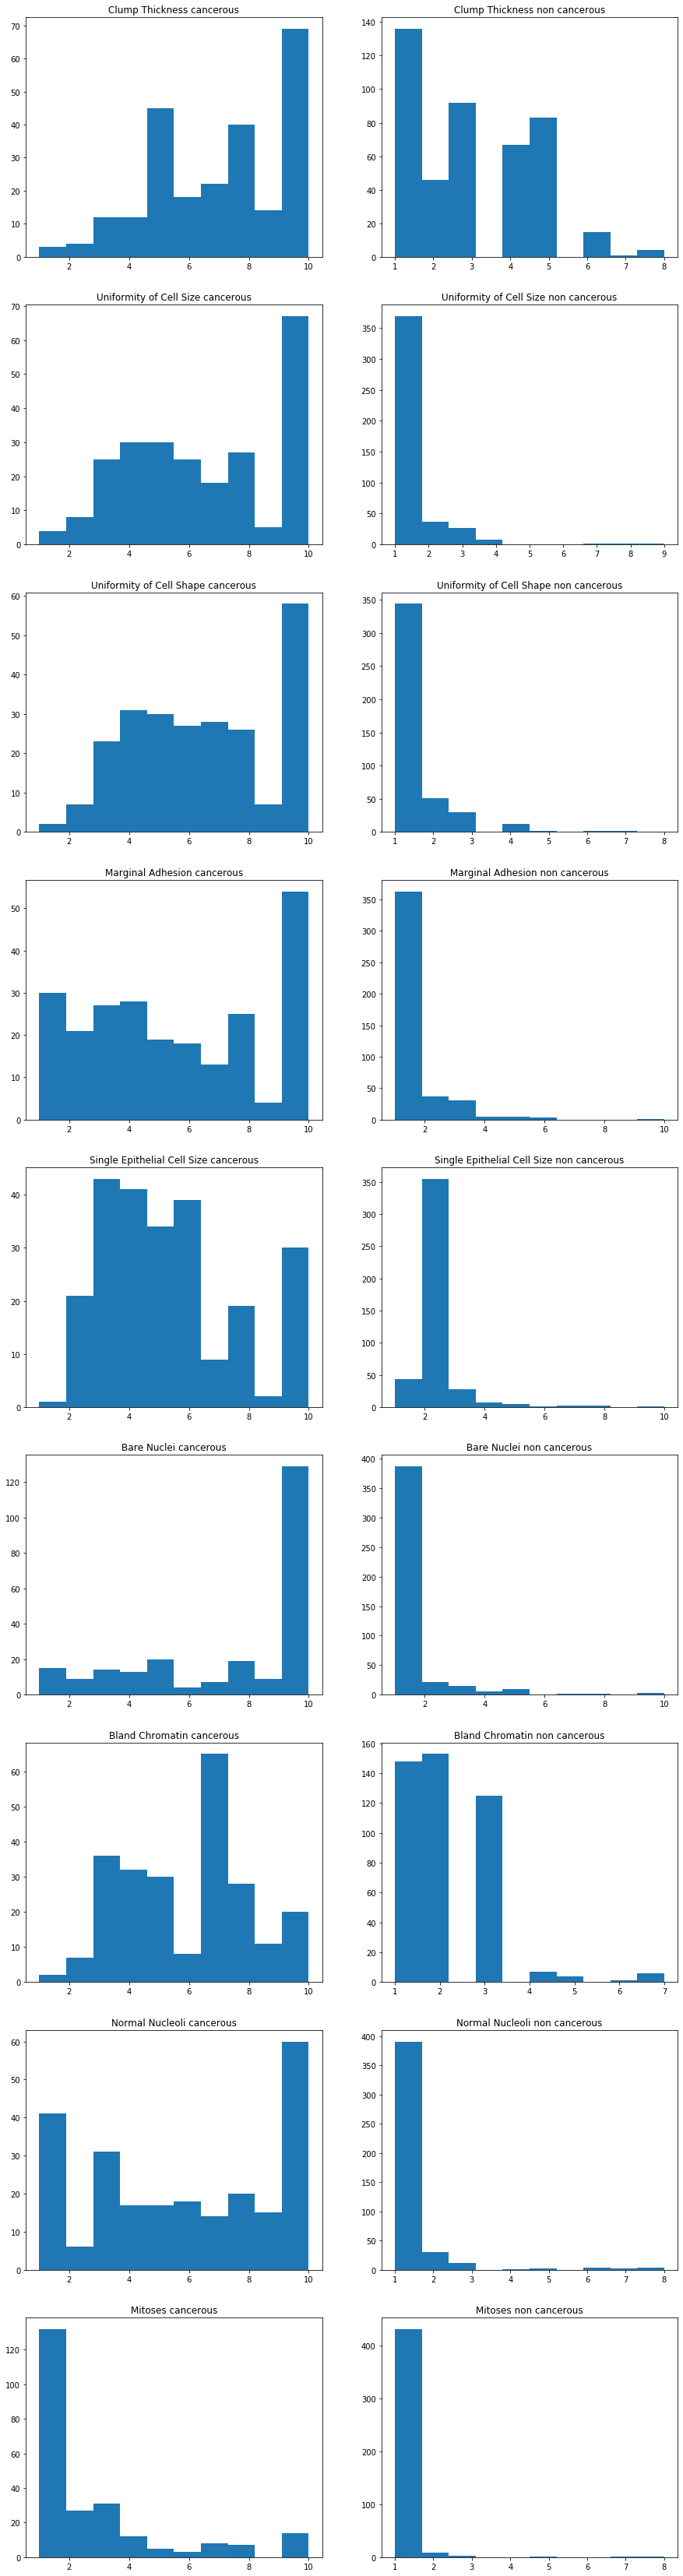

In [13]:
# plot histograms for each attribute

fig, axs = plt.subplots(len(cancer_headers)-2,2, figsize = (15,60))

for i,attribute in enumerate(cancer_headers[1:-1]):
    
    index = i+1 #since it starts at 0 but out cancer array has 'id number' as first col
    cancerous_attribute = [x for j,x in  enumerate(cancer[:,index]) if  cancer[j,-1] == 1]
    non_cancerous_attribute = [x for j,x in  enumerate(cancer[:,index]) if  cancer[j,-1] == 0]
    
    axs[i][0].hist(cancerous_attribute)
    axs[i][0].set_title(f'{attribute} cancerous')
    
    axs[i][1].hist(non_cancerous_attribute)
    axs[i][1].set_title(f'{attribute} non cancerous')
    
    
    mean_attribute_cancerous = np.mean(cancerous_attribute)
    mean_attribute_non_cancerous = np.mean(non_cancerous_attribute)

    std_attribute_cancerous = np.std(cancerous_attribute)
    std_attribute_non_cancerous = np.std(non_cancerous_attribute)

    print('Attribute: ',attribute,'. mean : ',mean_attribute_cancerous,' +- ',std_attribute_cancerous, '\nmean : ',mean_attribute_non_cancerous,' += ',std_attribute_non_cancerous,'\n')


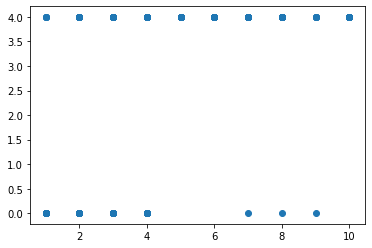

In [57]:
plt.scatter(cancer[:,2],cancer[:,-1])

In [66]:
[x for i,x in  enumerate(cancer[:,1]) if  cancercancer_good[i,-1] == 1]

[]

In [110]:
for i,attribute in enumerate(cancer_headers[1:-1]):
    index = i+1
    print(index,' ',attribute)

1   Clump Thickness
2   Uniformity of Cell Size
3   Uniformity of Cell Shape
4   Marginal Adhesion
5   Single Epithelial Cell Size
6   Single Epithelial Cell Size
7   Bare Nuclei
8   Bland Chromatin
9   Normal Nucleoli
10   Mitoses


In [117]:
len(cancer_headers)

12

In [20]:
# find correlation coefficients

corrcoefficients = np.corrcoef(wine_data[:,:-1],rowvar = False)

In [21]:
print(corrcoefficients.shape)

(11, 11)


In [98]:
[print(i) for i in corrcoefficients]
print(wine_headers[7])

[ 1.         -0.25613089  0.67170343  0.11477672  0.09370519 -0.15379419
 -0.11318144  0.66804729 -0.68297819  0.18300566 -0.06166827]
[-0.25613089  1.         -0.55249568  0.00191788  0.06129777 -0.01050383
  0.07647     0.02202623  0.23493729 -0.26098669 -0.20228803]
[ 0.67170343 -0.55249568  1.          0.14357716  0.20382291 -0.06097813
  0.03553302  0.36494718 -0.54190414  0.31277004  0.10990325]
[ 0.11477672  0.00191788  0.14357716  1.          0.05560954  0.187049
  0.20302788  0.35528337 -0.08565242  0.00552712  0.04207544]
[ 0.09370519  0.06129777  0.20382291  0.05560954  1.          0.00556215
  0.04740047  0.20063233 -0.26502613  0.37126048 -0.22114054]
[-0.15379419 -0.01050383 -0.06097813  0.187049    0.00556215  1.
  0.66766645 -0.02194583  0.0703775   0.05165757 -0.06940835]
[-0.11318144  0.07647     0.03553302  0.20302788  0.04740047  0.66766645
  1.          0.07126948 -0.06649456  0.04294684 -0.20565394]
[ 0.66804729  0.02202623  0.36494718  0.35528337  0.20063233 -0.0

In [99]:
d= {}
for i in range(len(corrcoefficients)):
    for j in range(len(corrcoefficients)- i):
        if  np.abs(corrcoefficients[i][j+i]) > 0.6:
            if i in d:
                print(i,' : ',j+i)
                d[i].append({wine_headers[j+i]:corrcoefficients[i][j+i]})
            else:
                d[i] = []

0  :  2
0  :  7
0  :  8
5  :  6


In [101]:
print(wine_headers)
d

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']


{0: [{'citric acid': 0.6717034347641061},
  {'density': 0.6680472921189732},
  {'pH': -0.6829781945685314}],
 1: [],
 2: [],
 3: [],
 4: [],
 5: [{'total sulfur dioxide': 0.6676664504810214}],
 6: [],
 7: [],
 8: [],
 9: [],
 10: []}

In [80]:
headers_to_rem = []
s = set(wine_headers)

for key, value in d.items():
    for i in value:
        headers_to_rem.append(i)
headers_to_rem = set(headers_to_rem)

In [83]:
# get the indeces in of each param in our wine_headers
indeces_to_keep = []
for item in s.difference(headers_to_rem):
    indeces_to_keep.append(wine_headers.index(item))


In [84]:
sorted(indeces_to_keep)


[0, 1, 3, 4, 5, 9, 10, 11]

In [62]:
wine_uncorrelated_data = np.take(wine_data, indeces_to_keep,axis = 1)

In [63]:
wine_uncorrelated_data.shape

(1599, 8)

In [75]:
np.inf < 10

False

In [85]:
headers_to_rem

{'citric acid', 'density', 'pH', 'total sulfur dioxide'}

In [90]:
wine_headers

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']